In [1]:
import os
import json
import sys

In [2]:
root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(root_dir)

### Dependencies 

In [3]:
# an example to load in a specfic module
from src.data.get_dataloader import get_dataloaders

### Config

In [4]:
# an example to load in a json
#path = "../config/example_config.json"
path = "../config/LeNet_config.json"
with open(path) as json_file:
    config = json.load(json_file)

In [5]:
config

{'experiment_name': 'test',
 'data': {'path': './data',
  'dataset': 'mnist',
  'image_channels': 1,
  'num_classes': 10,
  'batch_size': 512,
  'num_workers': 2,
  'val_split': 0.2},
 'model': {'type': 'CNN', 'save_path': '../models/CNN.pth'},
 'optimizer': {'type': 'sgd',
  'lr': 0.0001,
  'momentum': 0.9,
  'weight_decay': 0.0001,
  'nestrov': False},
 'training': {'epochs': 15, 'criterion': 'cross_entropy'},
 'visualize': {'perform': False, 'save_path': './reports/figures/'}}

In [6]:
# perform some modification
config['data']['path'] = "../data"
config['training']['epochs'] = 30

###  DataLoaders

In [7]:
from src.data.get_dataloader import get_dataloaders

In [8]:
train_dataloader, validation_dataloader, test_dataloader = get_dataloaders(config)

Creating dataloaders...
Dataloaders created


### Model

In [9]:
from src.model.get_model import get_model

In [10]:
model = get_model(config)

Creating model...
Model CNN created


### Training

In [11]:
from src.model.train_model import train_model

In [12]:
trained_model, training_losses, training_accuracies, validation_losses, validation_accuracies =\
    train_model(model, train_dataloader, validation_dataloader, config)

Training model...
Using device cuda


Train (loss=0.352, acc=90.085): 100%|███████████████████████████████| 30/30 [07:50<00:00, 15.69s/it]


### Testing

In [13]:
from src.model.test_model import test_model

In [14]:
testing_loss, testing_acc = test_model(model, test_dataloader, config)

Testing model...
Using device cuda
Testing loss: 0.3406, Testing accuracy: 90.8000


### Draw graph

In [15]:
from src.visualization.acc_loss import plot_acc_loss

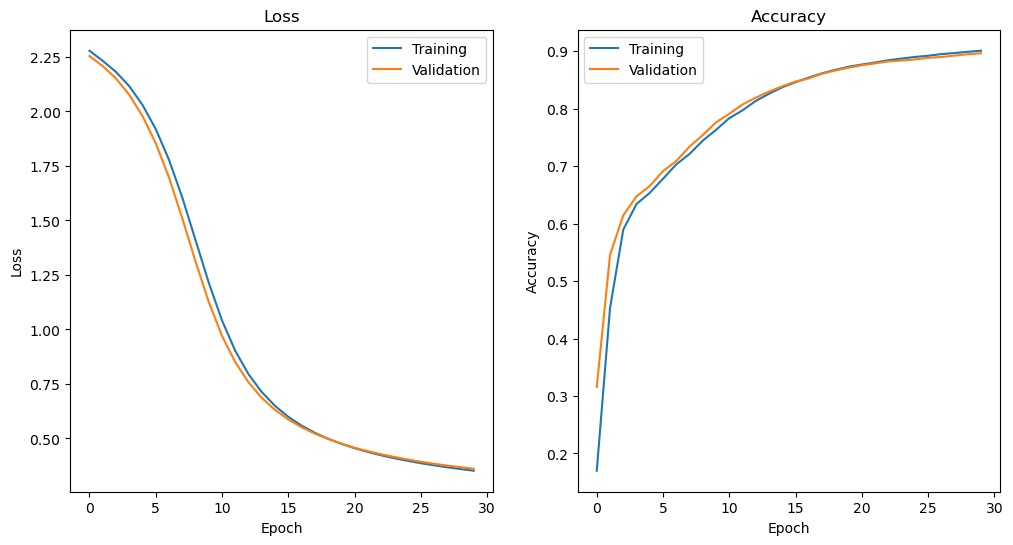

In [16]:
plot_acc_loss(training_losses, training_accuracies, validation_losses, validation_accuracies,
             path = "../reports/figures/train_validation_graph.jpg")

## Test on MSE

Creating model...
Model CNN created
Training model...
Using device cuda


Train (loss=0.061, acc=70.523): 100%|███████████████████████████████| 30/30 [08:21<00:00, 16.70s/it]


Testing model...
Using device cuda
Testing loss: 0.0607, Testing accuracy: 71.9200


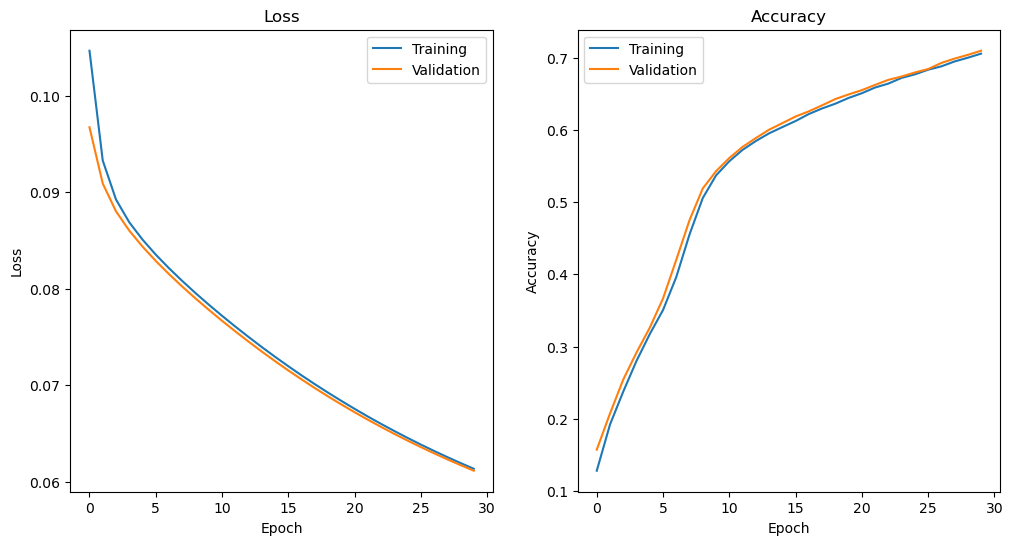

In [17]:
config['training']['criterion'] = "mse"
config['training']['lr'] = 1e-3
model = get_model(config)

trained_model, training_losses, training_accuracies, validation_losses, validation_accuracies =\
    train_model(model, train_dataloader, validation_dataloader, config)

testing_loss, testing_acc = test_model(model, test_dataloader, config)

plot_acc_loss(training_losses, training_accuracies, validation_losses, validation_accuracies)